## Posterior Bayes Vulnerability

 k = 3, under a nonuniform prior 1/2, 1/3, 1/6

In [1]:
import collections
import math
from sympy.utilities.iterables import partitions
import matplotlib.pyplot as plt 
%matplotlib notebook

### Variables

In [2]:
k = 3

In [3]:
n = 6

In [4]:
probs = [1/2, 1/3, 1/6]

In [5]:
range_max = 50

### Functions

In [6]:
def calc_set_partitions(n,p):
    num = math.factorial(n)
    den = 1
    val = 0
    for key in p.keys():
        val = p[key]
        for i in range(val):
            den = den * math.factorial(key)
        den = den * math.factorial(val)
    frac = num / den
    return frac

In [7]:
def calc_max_prob(p, Pi):
    Pi.sort(reverse=True)
    frac = 1
    ind = 0
    val = -1
    for key in sorted(p.keys(), reverse=True):
        val = p[key]
        for i in range(val):
            frac = frac * pow(Pi[ind], key)
            ind = ind + 1
    return frac

In [8]:
def nonuni_post_bayes_vuln(n, k, Pi):
    pbvsum = 0
    for p in partitions(n, m=k):  
        num = calc_set_partitions(n,p)
        frac = calc_max_prob(p, Pi)
        val = num * frac
        pbvsum = pbvsum + val
    return pbvsum

### Calculation

In [9]:
nonuni_post_bayes_vuln(n, k, probs)

0.43113425925925924

In [10]:
745/1728

0.43113425925925924

### Graph for n = 1 - 50

In [11]:
nupbvs = []
for i in range(1, range_max):
    nupbv = nonuni_post_bayes_vuln(i, k, probs)
    nupbvs.append(nupbv)
print(nupbvs)

[0.5, 0.41666666666666663, 0.4027777777777778, 0.3958333333333333, 0.4131944444444444, 0.43113425925925924, 0.45071373456790115, 0.47124164094650195, 0.49189546896433456, 0.5100027327674895, 0.5286089945558984, 0.5460162099551324, 0.5620028439536178, 0.5777079682945385, 0.5926510927572133, 0.6064540469803313, 0.6199858515476071, 0.6328641759507894, 0.6449275762052176, 0.6566809853732916, 0.6679182597648781, 0.6785217391782529, 0.6888306889914446, 0.6987095450758978, 0.708088772920213, 0.7171911765432654, 0.7259328612922994, 0.7342690325659702, 0.7423516001752649, 0.750126842643426, 0.7575671873933534, 0.7647772270497627, 0.7717230716833271, 0.778387857720002, 0.7848448735801133, 0.7910728732069704, 0.7970620098085374, 0.802864302920058, 0.8084667620927148, 0.8138640456690108, 0.8190935860760112, 0.8241477614597112, 0.8290241292085966, 0.8337499783661965, 0.8383211829261487, 0.8427371368666922, 0.847018000709073, 0.8511619078918214, 0.8551693921509967]


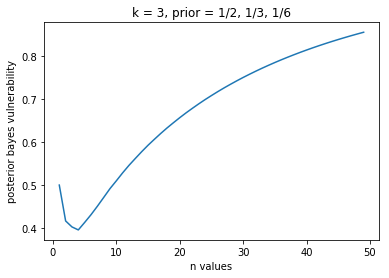

In [12]:
# plotting the points  
x = [i for i in range(1, range_max)]

plt.plot(x, nupbvs)

plt.xlabel('n values')
plt.ylabel('posterior bayes vulnerability')

plt.title('k = 3, prior = 1/2, 1/3, 1/6')

plt.show()